In [314]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [315]:
from os import listdir
from os.path import isfile, join
images_paths = [f for f in listdir('images') if isfile(join('images', f))]

In [316]:
image_path = 'images/EAN-UPC-EAN-13 MASTER GRADE IMGB.bmp' # C39_4.4LOW  C39_7.5UP  EAN128-DEFECTS IMGB  EAN128-MASTER IMGB  EAN-UPC-EAN-13 MASTER GRADE IMGB

In [349]:
image_path = f'images/{images_paths[9]}'

(1024, 1280, 3)


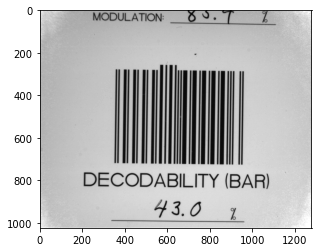

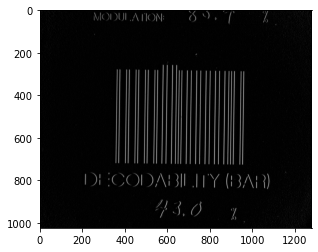

In [350]:
# load the image and convert it to grayscale
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(gray, 'gray')

# Find contours
kernel_horizontal_derivative = 1/4 * np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
image_horizontal_derivative = cv2.filter2D(gray, -1, kernel_horizontal_derivative)
image_horizontal_derivative = np.abs(image_horizontal_derivative)
kernel_vertical_derivative = 1/4 * np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
image_vertical_derivative = cv2.filter2D(gray, -1, kernel_vertical_derivative)
image_vertical_derivative = np.abs(image_vertical_derivative)

image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

plt.figure()
plt.imshow(image_horizontal_derivative, 'gray')

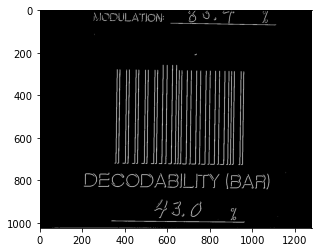

In [351]:
# Threshold, Otsu's algorithm
ret2,thresh = cv2.threshold(image_derivative,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure()
plt.imshow(thresh, 'gray')

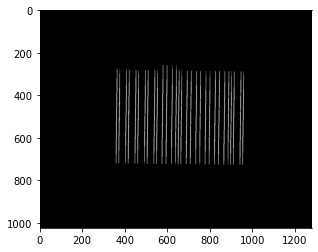

In [352]:
# Keep only vertical bars
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow(opened, 'gray')

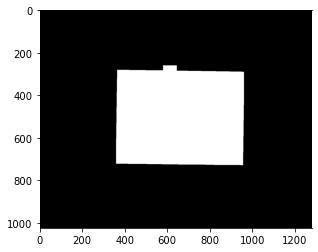

In [353]:
# OPTION A: closing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 50))
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

plt.figure()
plt.imshow(closed, 'gray')

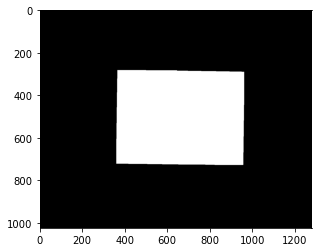

In [356]:
# Remove things outside
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (100, 1))
opened1 = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)

plt.figure()
plt.imshow(opened1, 'gray')

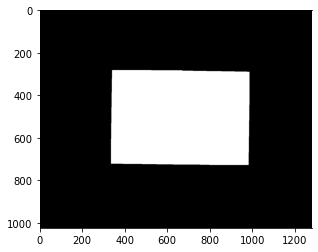

In [357]:
kernel = np.zeros((11,11),np.uint8)
kernel[5,:] = 1

dilated = cv2.dilate(opened1, kernel, iterations = 5)

plt.figure()
plt.imshow(dilated, 'gray')

Remove from here ...

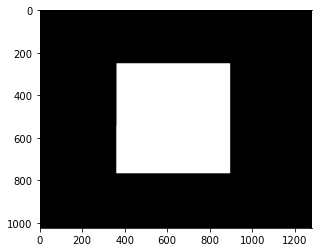

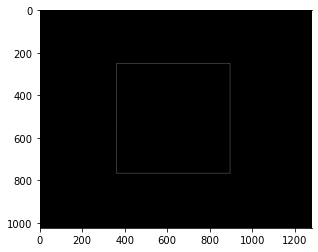

In [311]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1, 1))

dilated = cv2.dilate(opened1, None, iterations = 1)

plt.figure()
plt.imshow(dilated, 'gray')

#dilated = cv2.medianBlur(dilated,5)
#plt.figure()
#plt.imshow(dilated, 'gray')

contours = dilated - opened1
contours[contours<0] = 0

plt.figure()
plt.imshow(contours, 'gray')

TypeError: Invalid shape (2,) for image data

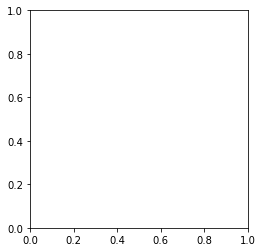

In [312]:
# Keep only vertical bars
kernel = np.zeros((5,5),np.uint8)
kernel[2,2] = 1
kernel[2,3] = 1
kernel[2,4] = 1
#kernel[2,3] = 1
#kernel[0,2] = 1
#kernel[1,2] = 1
#kernel[3,2] = 1
"""kernel = np.zeros((10,10),np.uint8)
kernel[0,0] = 1
kernel[0,1] = 1
kernel[0,2] = 1
kernel[0,3] = 1
kernel[0,4] = 1
kernel[0,5] = 1
kernel[0,6] = 1
kernel[0,7] = 1
kernel[0,8] = 1
kernel[0,9] = 1
kernel[1,0] = 1
kernel[2,0] = 1
kernel[3,0] = 1
kernel[4,0] = 1
kernel[5,0] = 1
kernel[6,0] = 1
kernel[7,0] = 1
kernel[8,0] = 1
kernel[9,0] = 1"""
"""kernel = np.zeros((2,2),np.uint8)
kernel[0,0] = 1
kernel[0,1] = 1
kernel[1,0] = 1"""

corners = cv2.morphologyEx(contours, cv2.MORPH_OPEN, kernel)
#corner1 = cv2.erode(contours, kernel)

plt.figure()
plt.imshow(corner1, 'gray')

In [264]:
y_list, x_list = np.where(corners==255)
print(y_list, x_list)

[ 257  257  257 ... 1055 1055 1055] [1193 1194 1195 ...  555  556  557]


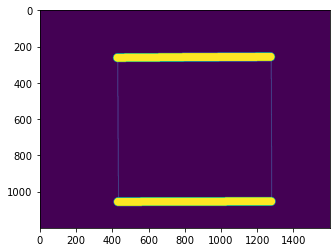

In [267]:
image_copy = corners.copy()
for y,x in zip(y_list,x_list):
    cv2.circle(image_copy , (x,y), 20 , 255, 5)
   
plt.imshow(image_copy+contours)
plt.show()

257 1055 1275 427
[[ 427  257]
 [1275  257]
 [1275 1055]
 [ 427 1055]]


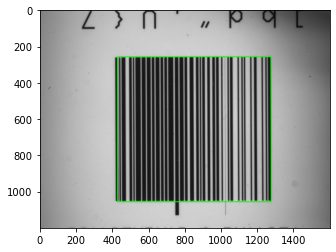

In [268]:
min_y = min(y_list)
max_y = max(y_list)
min_x = min(x_list)
max_x = max(x_list)
print(min_y, max_y, max_x, min_x)

corner1 = np.array([min_x, min_y])
corner2 = np.array([max_x, min_y])
corner3 = np.array([max_x, max_y])
corner4 = np.array([min_x, max_y])

def dist(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))

w = max([dist(corner1,corner2), dist(corner3,corner4)])
h = max([dist(corner1,corner4), dist(corner2,corner3)])

box = np.array([corner1,corner2,corner3,corner4])
print(box)

image_bb = image.copy()
cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
plt.figure()
plt.imshow(image_bb, 'gray')

In [192]:
(corner1==255).sum()

5

... to here.

In [299]:
def corners(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1, 1))

    dilated = cv2.dilate(image, None, iterations = 1)
    contours = dilated - opened1
    #contours[contours<0] = 0
    
    kernel = np.zeros((5,5),np.uint8)
    kernel[2,2] = 1
    kernel[2,3] = 1
    kernel[2,4] = 1
    corners = cv2.morphologyEx(contours, cv2.MORPH_OPEN, kernel)
    
    y_list, x_list = np.where(corners==255)
    
    min_y = min(y_list)
    max_y = max(y_list)
    min_x = min(x_list)
    max_x = max(x_list)
    #print(min_y, max_y, max_x, min_x)

    corner1 = np.array([min_x, min_y])
    corner2 = np.array([max_x, min_y])
    corner3 = np.array([max_x, max_y])
    corner4 = np.array([min_x, max_y])

    box = np.array([corner1,corner2,corner3,corner4])
    
    return box

[[ 193  130]
 [1361  130]
 [1361  384]
 [ 193  384]]


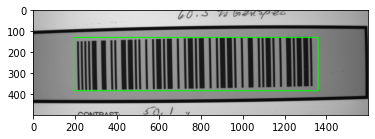

In [300]:
box = corners(dilated)
print(box)

image_bb = image.copy()
cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
plt.figure()
plt.imshow(image_bb, 'gray')

((659.76611328125, 504.1566162109375), (648.9046630859375, 442.5129089355469), 0.7313957810401917)
[[332 721]
 [338 278]
 [987 287]
 [981 729]]


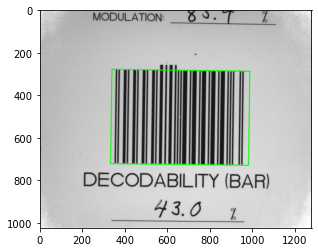

In [358]:
# Bounding box

# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#print(cnts)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
print(rect)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)
print(box)
# draw a bounding box arounded the detected barcode and display the
# image

image_bb = image.copy()
cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
plt.figure()
plt.imshow(image_bb, 'gray')

[(1299.0, 257.0), (404.0, 261.0), (1303.0, 1051.0), (407.0, 1055.0)]
[[ 261.  404.]
 [ 257. 1299.]
 [1051. 1303.]
 [ 407. 1055.]]


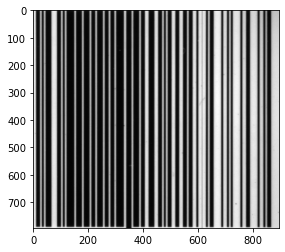

In [348]:
h = 1024
w = 1280

coordinates_source = box.astype('float32')
print(sorted([tuple(v) for v in coordinates_source], key=lambda t: (t[1],t[0])))
print(np.sort(coordinates_source))

min_width = coordinates_source[:,0].min()
min_height = coordinates_source[:,1].min()
max_width = coordinates_source[:,0].max()
max_height = coordinates_source[:,1].max()
def normalize(value, axis=0):
    if axis==0:  # Horizontal dimension
        return min_width if (value-min_width<max_width-value) \
                         else max_width
    elif axis==1:  # Vertical dimension
        return min_height if (value-min_height<max_height-value) \
                          else max_height
coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                            normalize(t[0], axis=0))))

def dist(point1, point2):
    return np.sqrt(np.sum((point1-point2)**2))
destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                         dist(coordinates_source[1],coordinates_source[3])]))
destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                         dist(coordinates_source[2],coordinates_source[3])]))
coordinates_destination = np.array([[0, 0],
                                    [destination_width-1, 0],
                                    [0, destination_height-1],
                                    [destination_width-1, destination_height-1]], dtype='float32')

# Computing the trasformation, i.e. homography. Warping.
H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)

# Applying the trasformation
gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))

plt.imshow(gray1, 'gray')